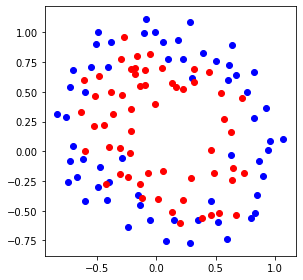

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()

plt.gca().set_aspect('equal', adjustable='box')
plt.show()


(9, 118)
(1000, 1000)


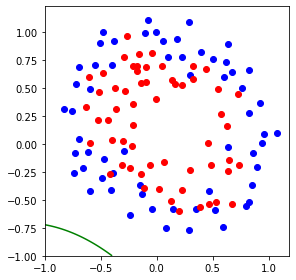

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    s = 1. / (1. + np.exp(-x))
    return s

def hx(theta, x):
    tx = sigmoid(np.dot(x,theta)).flatten()
    return tx

def minimize(x):
    if np.isneginf(np.log(x)):
        return 0.00001
    return np.log(x)

def costFunction(m, x, l, theta):
    exc = np.vectorize(minimize)
    
    log1 = exc(hx(theta, x))
    log2 = exc(1 - hx(theta, x))
    
    j = -(1 / m) * np.sum(l * log1 + (1 - l)*log2)
    return j

def gradientDescent(x, l, theta, m, alpha, iters):
    for i in range(iters):
        #j = costFunction(m,x,l,theta)
        #theta = (1 / m) * np.dot(x.T, sigmoid(np.dot(x, theta)) - l)
        theta = theta - ((alpha/m) * x.T @ (sigmoid(x @ theta)- l))
        #thetas.append(theta)
    return theta


if __name__ == '__main__':
    data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')
    pointX  = data[:, 0]
    pointY  = data[:, 1]
    label   = data[:, 2]
    
    pointX0 = pointX[label == 0]
    pointY0 = pointY[label == 0]
    

    pointX1 = pointX[label == 1]
    pointY1 = pointY[label == 1]
    
    x = np.array(data[:, 0])
    y = np.array(data[:, 1])
    label = np.array(label)
    
    #guessed polynomials
    x4 = x**4
    x3 = x**3
    x2 = x**2
    y4 = y**4
    y3 = y**3
    y2 = y**2
    ones = []
    
    for i in range(len(x)):
        ones.append(1)
    ones = np.array(ones)
    m = len(x)
    
    X = np.array([ones, x, y, x2, y2, x3, y3, x4, y4]).T
    theta = np.zeros((X.shape[1],1))
    
    a = 0.0001
    iters = 100000
    
    theta = gradientDescent(X, label, theta, m, a, iters)

    
    
    

In [29]:
markdown

1.9642437245146245
0.06891604040837536
0.23705850261037742
0.4680601604639819
0.5288454530980916
0.09374577878073985
0.19989421053003528
0.2234081866677631
0.274063380969442
[[ 1.96424372  1.96424372  1.96424372 ... -1.96424372 -1.96424372
  -1.96424372]
 [ 0.06891604  0.06891604  0.06891604 ... -0.06891604 -0.06891604
  -0.06891604]
 [ 0.2370585   0.2370585   0.2370585  ... -0.2370585  -0.2370585
  -0.2370585 ]
 ...
 [ 0.19989421  0.19989421  0.19989421 ... -0.19989421 -0.19989421
  -0.19989421]
 [ 0.22340819  0.22340819  0.22340819 ... -0.22340819 -0.22340819
  -0.22340819]
 [ 0.27406338  0.27406338  0.27406338 ... -0.27406338 -0.27406338
  -0.27406338]]


markdown